In [1]:
# 도미 데이터
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

In [2]:
# 빙어 데이터
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [3]:
import matplotlib.pyplot as plt

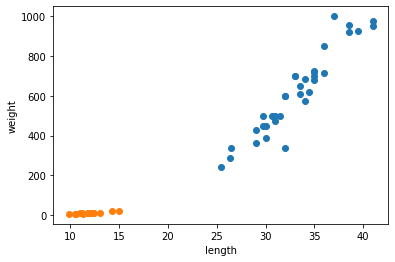

In [4]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [5]:
# 도미와 빙어 합치기
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [6]:
# zip함수와 리스트 내포
fish_data = [[l, w] for l, w in zip(length, weight)]  # 2차원 리스트 만들기
fish_data

[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

- sklearn 패키지를 사용하려면 각 특성의 리스트를 세로 방향으로 늘어뜨린 2차원 리스트를 만들어야 한다.
- zip() 함수는 나열된 리스트에서 원소를 하나씩 꺼내주는 일을 한다.

In [7]:
fish_target = [1]*35 + [0]*14
print(fish_target) # print 문으로 출력하면 줄바꿈 없이 출력됨

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [8]:
# k-최근접 이웃
from sklearn.neighbors import KNeighborsClassifier

In [9]:
kn = KNeighborsClassifier() # kn 모델 생성

In [10]:
kn.fit(fish_data, fish_target) # fit method는 주어진 데이터로 알고리즘을 훈련

KNeighborsClassifier()

In [11]:
kn.score (fish_data, fish_target) # score method는 사이킷런에서 모델을 평가
                                  # training data와 test data 가 다르므로 공정한 심사가 아님

1.0

- fit 메서드는 머신러닝에서 훈련을 시키는 역할
- score 메서드는 사이킷런에서 모델을 평가하는 역할
- predict 메서드는 새로운 데이터의 정답을 예측하는 역할

In [12]:
# 새로운 생선 예측
kn.predict([[30, 600]])

array([1])

In [13]:
# 무조건 도미
kn49 = KNeighborsClassifier(n_neighbors = 49) # 매개변수 p는 거리 재는 방법 지정 
                                              # p=1 맨해튼거리 p=2 유클리디안 거리, 기본값은 2
                                              # n_jobs 매개변수는 사용할 CPU 코어 지정
                                              # -1 이면 모든 CPU코어 사용, 기본값은 1

In [14]:
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target) # n_neighbors 매개변수를 49로 두는 것은 좋지 않은 모델

0.7142857142857143

In [15]:
print(kn._fit_X)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [16]:
print(kn._y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [17]:
print(35/49)

0.7142857142857143


In [28]:
# 훈련 세트와 테스트 세트
train_input = fish_data[:35]
train_target = fish_target[:35]

test_input = fish_data[35:]
test_target = fish_target[35:]

In [29]:
# 테스트 세트에서 평가하기
kn.fit(train_input, train_target) # training data와 test data가 다르므로 공정한 심사
kn.score(test_input, test_target)  # 빙어 없이 모델을 훈련하여 샘플링 편향이 일어남

0.0

- 샘플링 편향: 훈련 세트와 테스트 세트에 샘플이 골고루 섞여 있지 않으면 샘플링이 한쪽으로 치우친다는 의미

In [20]:
# numpy 사용하기
import numpy as np

In [30]:
input_arr = np.array(fish_data) # 리스트를 넘파이 배열로 바꾸기
target_arr = np.array(fish_target)

In [31]:
# np.random.seed(42) 재현성을 위해 설정
index = np.arange(49)  
np.random.shuffle(index) # 주어진 배열을 무직위를 섞는 함수

In [35]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]] # input_arr과 target_arr이 함께 선택되기 위해 셔플된 인덱스로 추출

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

- numpy는 슬라이싱 외에 배열 인덱싱 기능도 제공
- 배열 인덱싱: 여러 개의 인덱스로 한 번에 여러 개의 원소를 선택할 수 있다.

In [32]:
# 배열 인덱싱 예시
print(input_arr[[1, 3]])

[[ 26.3 290. ]
 [ 29.  363. ]]


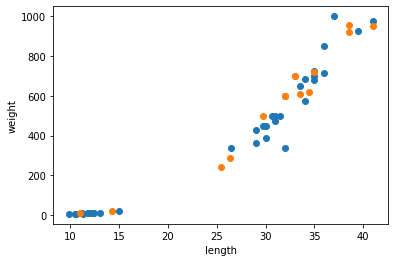

In [36]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [37]:
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [26]:
kn.predict(test_input)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1])

In [27]:
test_target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1])

- sklearn 모델의 입력과 출력은 모두 numpy 배열